In [1]:
# Adding src module to path
import sys
import os
module_path = os.path.abspath(os.path.join('../..'))

if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
# general imports
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib notebook

import src.utils as utils
from src.nqs import RBM, RandomHamiltonian

In [27]:
#Initializing starting values 
visible_size = 6
hidden = 12
steps = 2000

seed = 45

#Finding true ground state energy and displaying it
np.random.seed(seed)


In [28]:
H = RandomHamiltonian(n = visible_size)
#print(f"hamiltonian: {H}")
rbm = RBM(visible_size=visible_size, hidden_size=hidden, hamiltonian=H, walker_steps=0)

eig, state = np.linalg.eigh(H)
print(f"Eig: {eig},state: \n{state}")
E_truth = np.min(eig)
e_truth_index = np.argmin(eig)
#print(f"Eig index: {e_truth_index}")
gstate = state[:,e_truth_index]
#print(f"g state: {gstate}")
energy_list = rbm.train(iterations=steps, lr=0.01, print_energy=False)
#print(rbm.train.run_time)

Eig: [-30.31210895 -28.93720057 -26.85978559 -25.22504106 -23.24759256
 -22.78636624 -22.07083135 -20.98613187 -19.5496997  -18.36904725
 -17.61266726 -17.20223991 -16.26235752 -15.69233881 -15.12405729
 -13.82157112 -12.70744819 -11.35850034 -10.96070243  -9.89770888
  -9.37186377  -8.30523702  -7.78343912  -6.84808124  -6.19249198
  -5.14384828  -4.4228724   -4.04339778  -2.97003724  -2.66252769
  -1.62640872  -0.48884175  -0.03198821   0.65920474   1.78462795
   2.48416353   3.15805938   4.09249465   4.90514975   6.19540431
   6.74434511   7.16437488   7.87625775   8.59537449   9.60062284
  10.33120119  10.96607549  11.89518567  12.58231464  13.23919513
  14.22671037  15.70492024  15.9076364   17.63747943  19.36638407
  19.92388346  21.2980666   22.66767087  23.18332523  24.34301065
  26.07498845  26.38180855  28.74272307  31.03825929],state: 
[[-0.0711305 +0.j          0.15644388+0.j         -0.09815063+0.j
  ...  0.11834498+0.j         -0.14895572+0.j
   0.10935771+0.j        ]
 [

<IPython.core.display.Javascript object>


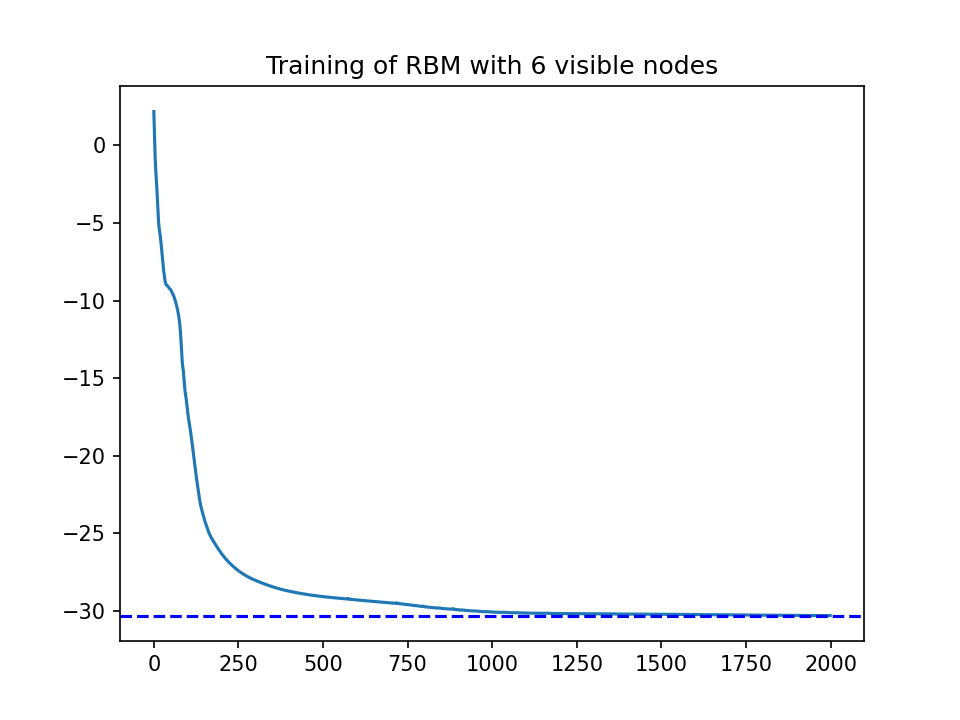

Text(0.5, 1.0, 'Training of RBM with 6 visible nodes')

In [29]:

plt.plot(energy_list)

plt.axhline(y=E_truth, color='b', linestyle='--')
plt.title(f"Training of RBM with {visible_size} visible nodes")


In [30]:
# plt.ioff() # uncomment to stop plotting in notebook

print(f"Ground state energy found: {energy_list[-1]}")
print(f"True energy ground state: {E_truth}")
print(f"Accuracy: {np.abs((E_truth-energy_list[-1])/abs(E_truth))}") # relative error

Ground state energy found: -30.29620010614586
True energy ground state: -30.31210895466823
Accuracy: 0.0005248347631027617


In [31]:
print(f"RBM wave function: \n{rbm.wave_function()}")
print(f"True ground state: \n{gstate}")
print(gstate.shape)
print(f"RBM state error: {1- (np.abs(gstate.T.conj() @ rbm.wave_function()))}")


RBM wave function: 
[[ 0.03669625-0.03894899j]
 [-0.06667265+0.01166058j]
 [ 0.14045843+0.03361143j]
 [ 0.06065757+0.009463j  ]
 [-0.04121764+0.11512942j]
 [ 0.33384786-0.12772555j]
 [-0.04543942+0.02076759j]
 [ 0.00267687-0.01600608j]
 [-0.04882598+0.07888398j]
 [ 0.15587351+0.0890875j ]
 [ 0.00913108+0.13230918j]
 [ 0.00685593+0.18921274j]
 [ 0.0405238 +0.0377072j ]
 [ 0.04046048+0.04433384j]
 [ 0.07764864+0.00206243j]
 [-0.07767289+0.18417004j]
 [ 0.06155921+0.07528994j]
 [-0.01948854+0.03030713j]
 [-0.0203244 -0.07597671j]
 [ 0.00953736-0.05238002j]
 [ 0.05583308-0.09973772j]
 [-0.1404911 +0.05461797j]
 [ 0.01440142-0.0256324j ]
 [-0.03278473+0.09043076j]
 [ 0.07348405+0.0707956j ]
 [ 0.02691146-0.01826019j]
 [ 0.04765492-0.13137553j]
 [ 0.09361947+0.02224778j]
 [-0.00398115-0.09659543j]
 [-0.02324182-0.07245914j]
 [-0.0134901 +0.04515891j]
 [ 0.20671966-0.10221043j]
 [-0.03154824+0.04407339j]
 [ 0.15519708+0.13615975j]
 [ 0.01475684-0.0539976j ]
 [-0.06852338-0.0889006j ]
 [ 0.067